#### wordcloud

In [181]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from soynlp.normalizer import *
from hanspell import spell_checker
from konlpy.tag import Okt

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score, roc_auc_score, roc_curve

#wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# 한글화
import matplotlib.pyplot as plt 
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc('font', family='Arial Unicode MS')
%matplotlib inline                   

In [2]:
df_review = pd.read_csv('review_all_morph_tknized_rmved_v2.csv')
df_review = df_review[['date', 
          'tokenized_review', 
          'tokenized_removed_review', 
          'reviews_for_vectorize', 
          'noun_tokenized_review', 
          'noun_tokenized_removed_review', 
          'noun_reviews_for_vectorize', 
          'rating', 'label']]

df_review

,date,tokenized_review,tokenized_removed_review,reviews_for_vectorize,noun_tokenized_review,noun_tokenized_removed_review,noun_reviews_for_vectorize,rating,label
0,2023-09-10,"['상세', '설명', '에', '들어가지', '않아도', '검색', '결과', '...","['상세', '설명', '들어가지', '않아도', '검색', '결과', '중량', ...",상세 설명 들어가지 않아도 검색 결과 중량 가격 확인 되면 더 편리하겠습니다,"['상세', '설명', '검색', '결과', '중량', '가격', '바로', '확인...","['상세', '설명', '검색', '결과', '중량', '가격', '확인', '더']",상세 설명 검색 결과 중량 가격 확인 더,5,1.0
1,2023-09-09,"['필터', '기능', '잘', '되어있어', '편하게', '쇼핑', '함']","['필터', '기능', '잘', '되어있어', '편하게', '쇼핑', '함']",필터 기능 잘 되어있어 편하게 쇼핑 함,"['필터', '기능', '쇼핑', '함']","['필터', '기능', '쇼핑', '함']",필터 기능 쇼핑 함,5,1.0
2,2023-09-09,"['배송', '이', '빨라요', '그리고', '할인', '이', '많아요']","['배송', '빨라요', '할인', '많아요']",배송 빨라요 할인 많아요,"['배송', '할인']","['배송', '할인']",배송 할인,5,1.0
3,2023-09-09,"['50', '퍼', '쿠폰', '만원', '빵빵', '하게', '주는', '곳',...","['50', '퍼', '쿠폰', '만원', '빵빵', '하게', '주는', '곳',...",50 퍼 쿠폰 만원 빵빵 하게 주는 곳 처음 봄 주문 하면 6시간 만에 옴 앱 뭐,"['쿠폰', '만원', '빵빵', '곳', '처음', '봄', '주문', '옴', ...","['쿠폰', '만원', '빵빵', '곳', '처음', '봄', '주문', '옴', ...",쿠폰 만원 빵빵 곳 처음 봄 주문 옴 앱 뭐,5,1.0
4,2023-09-09,"['빠른', '배송']","['빠른', '배송']",빠른 배송,['배송'],['배송'],배송,5,1.0
...,...,...,...,...,...,...,...,...,...
11224,2016-03-02,"['모바일', '로', '쉽게', '살', '수', '있어서']","['모바일', '쉽게', '살', '있어서']",모바일 쉽게 살 있어서,"['모바일', '살', '수']","['모바일', '살']",모바일 살,5,1.0
11225,2016-03-02,"['아이', '를', '키우며', '좋은', '식', '자재', '에', '대한',...","['키우며', '좋은', '식', '자재', '대한', '갈증', '있는데', '이...",키우며 좋은 식 자재 대한 갈증 있는데 이렇게 건강하고 신선한 먹거리 쉽게 접 있...,"['아이', '식', '자재', '대한', '갈증', '먹거리', '접', '수',...","['식', '자재', '대한', '갈증', '먹거리', '접', '컴퓨터', '엄마...",식 자재 대한 갈증 먹거리 접 컴퓨터 엄마 앱 지금 처럼 식탁,5,1.0
11226,2016-03-02,"['아는', '동생', '소개', '로', '알', '게', '된', '마켓', '...","['아는', '동생', '소개', '알', '게', '된', '마켓', '컬리', ...",아는 동생 소개 알 게 된 마켓 컬리 늦게 게 아쉬울 정도 제품 퀄리티 완젼 좋고...,"['동생', '소개', '알', '마켓', '컬리', '안', '게', '정도', ...","['동생', '소개', '알', '마켓', '컬리', '게', '정도', '제품',...",동생 소개 알 마켓 컬리 게 정도 제품 퀄리티 완젼 포장 배송 눈 안보 사도 정말...,5,1.0
11227,2016-03-02,"['샛별', '배송', '정말', '훌륭합니다', '컬리', '라면', '무조건',...","['샛별', '배송', '정말', '훌륭합니다', '컬리', '라면', '무조건',...",샛별 배송 정말 훌륭합니다 컬리 라면 무조건 믿고 주문,"['샛별', '배송', '정말', '컬리', '라면', '무조건', '주문']","['샛별', '배송', '정말', '컬리', '라면', '무조건', '주문']",샛별 배송 정말 컬리 라면 무조건 주문,5,1.0


---

#### noun

In [81]:
#vectorize reviews
contents_for_vectorize_noun = df_review['noun_reviews_for_vectorize']

#TfidfVectorizer
vectorizer_tfidf_noun = TfidfVectorizer(min_df=10, decode_error='ignore')

vectorizer_tfidf_noun.fit_transform(contents_for_vectorize_noun)

#말뭉치
corpus_noun = []

for word in vectorizer_tfidf_noun.get_feature_names_out():
    corpus_noun.append(word)

In [82]:
#logistic regression

#feature, label 분리
X_noun = vectorizer_tfidf_noun.fit_transform(contents_for_vectorize_noun)
y_noun = df_review['label']

#train, test data 분리
X_noun_train, X_noun_test, y_noun_train, y_noun_test = train_test_split(X_noun, 
                                                                        y_noun, 
                                                                        test_size=0.3, 
                                                                        random_state=13, 
                                                                        stratify=y_noun)

#kfold(StratifiedKFold가 좋을까?)
skfold = StratifiedKFold(n_splits=5)


#평가지표
accuracy = []
f1 = []
auc = []


#test_data 평가지표
accuracy_test = []
f1_test = []
auc_test = []


logistic_reg_noun = LogisticRegression(solver = 'sag', max_iter = 1000, penalty='l2', C=3)
    
for train_idx, validation_idx in skfold.split(X_noun_train, y=y_noun_train):
        
    X_train = X_noun_train[train_idx]
    X_validation = X_noun_train[validation_idx]
        
    y_train = y_noun_train.iloc[train_idx]
    y_validation = y_noun_train.iloc[validation_idx]
        
    #fit_predict
    logistic_reg_noun.fit(X_train, y_train)
    pred_validation = logistic_reg_noun.predict(X_validation)
        
        
    #accuracy, f1, auc
    accuracy.append(accuracy_score(pred_validation, y_validation))
    f1.append(f1_score(pred_validation, y_validation))
    auc.append(roc_auc_score(pred_validation, y_validation))
    
pred_test = logistic_reg_noun.predict(X_noun_test) 
        
#test_data accuracy, f1, auc
accuracy_test.append(accuracy_score(pred_test, y_noun_test))
f1_test.append(f1_score(pred_test, y_noun_test))
auc_test.append(roc_auc_score(pred_test, y_noun_test))
    
#평가지표

print('accuracy of sag : {}'.format(sum(accuracy) / len(accuracy)))
print('-'*100)
print('f1 of sag : {}'.format(sum(f1) / len(f1)))
print('-'*100)
print('auc of sag : {}'.format(sum(auc) / len(auc)))

print('='*100)


print('accuracy_test of sag : {}'.format(accuracy_test))
print('-'*100)
print('f1_test of sag : {}'.format(f1_test))
print('-'*100)
print('auc_test of sag : {}'.format(auc_test))

accuracy of sag : 0.9034351145038167
----------------------------------------------------------------------------------------------------
f1 of sag : 0.9416125978738783
----------------------------------------------------------------------------------------------------
auc of sag : 0.8761523192939134
accuracy_test of sag : [0.9032353814188187]
----------------------------------------------------------------------------------------------------
f1_test of sag : [0.9413246940244782]
----------------------------------------------------------------------------------------------------
auc_test of sag : [0.871103336375621]


----

#### 전처리

In [83]:
pred_test

array([0., 1., 1., ..., 1., 0., 1.])

In [84]:
y_noun_test

7159    0.0
3181    1.0
5345    1.0
7995    1.0
4931    1.0
       ... 
8530    1.0
9709    1.0
6855    1.0
1103    0.0
2477    1.0
Name: label, Length: 3369, dtype: float64

In [85]:
#y_noun_test label과 예측 결과를 dataframe으로 변환
df_wordcloud = y_noun_test.to_frame()
df_wordcloud['pred'] = pred_test
df_wordcloud['TF'] = df_wordcloud['label'] == df_wordcloud['pred']
df_wordcloud

,label,pred,TF
7159,0.0,0.0,True
3181,1.0,1.0,True
5345,1.0,1.0,True
7995,1.0,1.0,True
4931,1.0,1.0,True
...,...,...,...
8530,1.0,1.0,True
9709,1.0,1.0,True
6855,1.0,1.0,True
1103,0.0,0.0,True


In [86]:
#y_noun_test로 분류된 '리뷰', 'label', 'pred_test(test_data예측결과)'를 dataframe으로 만든다.
review = []

for i in y_noun_test.index:
    review.append(df_review['noun_reviews_for_vectorize'][i].strip())
    
df_wordcloud['review'] = review
df_wordcloud = df_wordcloud[['review', 'label', 'pred', 'TF']]
df_wordcloud

,review,label,pred,TF
7159,업데이트 앱 실행,0.0,0.0,True
3181,배송 품질,1.0,1.0,True
5345,물건,1.0,1.0,True
7995,자주 이용 할인 쿠폰 적립 물건,1.0,1.0,True
4931,친구 추천 마켓 컬리 이용 포장 배송 상품 쿠팡 우회 쿠팡 충성 고객 요즘 마켓 컬...,1.0,1.0,True
...,...,...,...,...
8530,가끔 렉 연관 선택 카테고리 생기 선택 상품 구매 산 품목,1.0,1.0,True
9709,서비스 배송,1.0,1.0,True
6855,쪼아,1.0,1.0,True
1103,업데이트 장바구니 물건 마음 평화 그냥 데 구매,0.0,0.0,True


---

#### wordcloud_1

In [87]:
df_wordcloud_1 = df_wordcloud[df_wordcloud['pred'] == 1.0]
df_wordcloud_1

,review,label,pred,TF
3181,배송 품질,1.0,1.0,True
5345,물건,1.0,1.0,True
7995,자주 이용 할인 쿠폰 적립 물건,1.0,1.0,True
4931,친구 추천 마켓 컬리 이용 포장 배송 상품 쿠팡 우회 쿠팡 충성 고객 요즘 마켓 컬...,1.0,1.0,True
9498,이용,1.0,1.0,True
...,...,...,...,...
8998,자주 애용 정말,1.0,1.0,True
8530,가끔 렉 연관 선택 카테고리 생기 선택 상품 구매 산 품목,1.0,1.0,True
9709,서비스 배송,1.0,1.0,True
6855,쪼아,1.0,1.0,True


In [89]:
text_review1 = '. '.join(df_wordcloud_1['review'])
text_review1

'배송 품질. 물건. 자주 이용 할인 쿠폰 적립 물건. 친구 추천 마켓 컬리 이용 포장 배송 상품 쿠팡 우회 쿠팡 충성 고객 요즘 마켓 컬리 이용 답니. 이용. 배송. 가격 배송 개입 니 할인 쿠폰 금액 커서. 서비스 제품 상품. 주문 배송. 적립금. 식품 주문 성공 젠 그냥 주문 신선 식품 주문 컬리 최고. 마트 사용. 서비스 최상. 마켓 컬리. 새벽 배송. 사용 물건. 장 즐거움 마켓. 직관. 합리 가격. 배송 제품. 후기 란 개선 매우 후기 보라 그냥 포인트 보기 쓰기 불편 수정 후기 내용 목록 몀 스 크롤 맨 위로 후기 내용 미리 보기 후기 정렬 카테고리. 주문 물품 추가 기능 가끔 주문 경우 주문 추가 기능. 배송. 주문 날 배송. 찜 기능. 쿠폰 자주 상품 가격 구매. 이벤트 자주. 주로 대형 마트 구매 생각 상품. 식 자재 살 사이트 가격 더. 배송 배송 빨 제품 최고. 아주. 첫 주문 쿠폰 적립 쿠폰 담날 새벽 품질 상품 배달 구매 배송비 무료 단점 의사. 쿠폰 적용 상품. 물건. 타 사이트 메뉴 별 항목 정돈 보기 화면 볼 역도 더 정리 느낌 검색어 입력 관련 항목 나열 게 품절 시 맨 마지막 정리 한참 게. 더 제품. 적립. 검색 리뷰 주로 선택 데 리뷰 신뢰. 주소 잘못 물품 못 수거 직접 해주시 지난 음식 직접 처리 해주시 학도 진행 과정 처리 과정 설명 아주 상담. 앱 사용. 엄마 최고. 물품 제공. 직관. 다시 앱 선녀 신형 앱 뭐 못. 배송 품질 최고. 이용 가격 새벽 문 앞 배달. 실제. 사용. 애 엄마 장 게 제일 안심 정말 마콜 최고. 배송. 닭 가슴 살 주문 가능. 아주 내 스타일 이군. 집 그냥 땐 새벽 배송 출근 냉동 제품 냉장 제품 선택 충청 지역 새벽 배송 니요 새벽 출근 배송 완료. 컬리 앱. 혁명 핸드폰 하나로 마트 턺. 채소. 아주 만족. 여자친구 소개 알 바 그냥 지속 발전 게 소비자 입장 보임 단연 최고 말 할인 혜택 쿠폰 물건 질 샛별 배송 모든 게 앱 후기 앱 설문조사 그냥 마켓 컬리 추천. 할인 쿠폰 식품

In [55]:
# #txt 파일 열기
# wordcloud1 = open('wordcloud1.txt', 'w')
# wordcloud1.write(text_review1)
# wordcloud1.close()

In [90]:
#Okt로 명사단위 토큰화
okt = Okt()

token_review1 = okt.nouns(text_review1)
token_review1

['배송',
 '품질',
 '물건',
 '자주',
 '이용',
 '할인',
 '쿠폰',
 '적립',
 '물건',
 '친구',
 '추천',
 '마켓',
 '컬리',
 '이용',
 '포장',
 '배송',
 '상품',
 '쿠팡',
 '우회',
 '쿠팡',
 '충성',
 '고객',
 '요즘',
 '마켓',
 '컬리',
 '이용',
 '답',
 '이용',
 '배송',
 '가격',
 '배송',
 '개입',
 '니',
 '할인',
 '쿠폰',
 '금액',
 '커서',
 '서비스',
 '제품',
 '상품',
 '주문',
 '배송',
 '적립금',
 '식품',
 '주문',
 '성공',
 '젠',
 '그냥',
 '주문',
 '신선',
 '식품',
 '주문',
 '컬리',
 '최고',
 '마트',
 '사용',
 '서비스',
 '최상',
 '마켓',
 '컬리',
 '새벽',
 '배송',
 '사용',
 '물건',
 '장',
 '즐거움',
 '마켓',
 '직관',
 '합리',
 '가격',
 '배송',
 '제품',
 '후기',
 '란',
 '개선',
 '매우',
 '후기',
 '보라',
 '그냥',
 '포인트',
 '보기',
 '쓰기',
 '불편',
 '수정',
 '후기',
 '내용',
 '목록',
 '몀',
 '스',
 '크롤',
 '맨',
 '위로',
 '후기',
 '내용',
 '미리',
 '보기',
 '후기',
 '정렬',
 '카테고리',
 '주문',
 '물품',
 '추가',
 '기능',
 '가끔',
 '주문',
 '경우',
 '주문',
 '추가',
 '기능',
 '배송',
 '주문',
 '날',
 '배송',
 '찜',
 '기능',
 '쿠폰',
 '자주',
 '상품',
 '가격',
 '구매',
 '이벤트',
 '자주',
 '주로',
 '대형',
 '마트',
 '구매',
 '생각',
 '상품',
 '식',
 '자재',
 '살',
 '사이트',
 '가격',
 '더',
 '배송',
 '배송',
 '빨',
 '제품',
 '최고',
 '아주',
 '첫',
 '주문',
 '쿠폰',
 '적립'

In [91]:
#nltk_Text
token_review1 = nltk.Text(tknized_review1, name='predicted_pos_review')
token_review1

<Text: predicted_pos_review>

In [92]:
for i in token_review1:
    print(i)

배송
품질
물건
자주
이용
할인
쿠폰
적립
물건
친구
추천
마켓
컬리
이용
포장
배송
상품
쿠팡
우회
쿠팡
충성
고객
요즘
마켓
컬리
이용
답
이용
배송
가격
배송
개입
니
할인
쿠폰
금액
커서
서비스
제품
상품
주문
배송
적립금
식품
주문
성공
젠
그냥
주문
신선
식품
주문
컬리
최고
마트
사용
서비스
최상
마켓
컬리
새벽
배송
사용
물건
장
즐거움
마켓
직관
합리
가격
배송
제품
후기
란
개선
매우
후기
보라
그냥
포인트
보기
쓰기
불편
수정
후기
내용
목록
몀
스
크롤
맨
위로
후기
내용
미리
보기
후기
정렬
카테고리
주문
물품
추가
기능
가끔
주문
경우
주문
추가
기능
배송
주문
날
배송
찜
기능
쿠폰
자주
상품
가격
구매
이벤트
자주
주로
대형
마트
구매
생각
상품
식
자재
살
사이트
가격
더
배송
배송
빨
제품
최고
아주
첫
주문
쿠폰
적립
쿠폰
담날
새벽
품질
상품
배달
구매
배송비
무료
단점
의사
쿠폰
적용
상품
물건
타
사이트
메뉴
별
항목
정돈
보기
화면
볼
역도
더
정리
느낌
검색어
입력
관련
항목
나열
게
품절
시
맨
마지막
정리
한참
게
더
제품
적립
검색
리뷰
주로
선택
데
리뷰
신뢰
주소
잘못
물품
못
수거
직접
해주시
지난
음식
직접
처리
해주시
학도
진행
과정
처리
과정
설명
아주
상담
앱
사용
엄마
최고
물품
제공
직관
다시
앱
선녀
신형
앱
뭐
못
배송
품질
최고
이용
가격
새벽
문
앞
배달
실제
사용
애
엄마
장
게
제일
안심
정말
마콜
최고
배송
닭
가슴
살
주문
가능
아주
내
스타일
이군
집
그냥
땐
새벽
배송
출근
냉동
제품
냉장
제품
선택
충청
지역
새벽
배송
니요
새벽
출근
배송
완료
컬리
앱
혁명
핸드폰
하나로
마트
턺
채소
아주
만족
여자친구
소개
알
바
그냥
지속
발전
게
소비자
입장
보임
단연
최고
말
할인
혜택
쿠폰
물건
질
샛별
배송
모든
게
앱
후기
앱
설문조사
그냥
마켓
컬리
추천
할인
쿠폰
식품
신선
배송
컬리
앱
설정
설정
음식
배달
문
앞
배송
최고
가성
비
고추장
불고기
최애
대박
나시
품절
직

In [93]:
#단어 빈도수
token_review1.vocab().most_common(150) 

[('배송', 844),
 ('상품', 361),
 ('사용', 323),
 ('컬리', 311),
 ('제품', 284),
 ('앱', 241),
 ('주문', 239),
 ('마켓', 216),
 ('이용', 199),
 ('새벽', 179),
 ('포장', 173),
 ('쿠폰', 171),
 ('구매', 155),
 ('더', 144),
 ('정말', 144),
 ('자주', 133),
 ('최고', 125),
 ('물건', 117),
 ('가격', 117),
 ('게', 104),
 ('아주', 100),
 ('품질', 95),
 ('할인', 86),
 ('샛별', 82),
 ('장', 76),
 ('식품', 75),
 ('보기', 75),
 ('아침', 75),
 ('배달', 70),
 ('앞', 67),
 ('음식', 66),
 ('재료', 66),
 ('결제', 66),
 ('쇼핑', 64),
 ('검색', 61),
 ('볼', 60),
 ('만족', 60),
 ('항상', 58),
 ('애용', 55),
 ('기능', 53),
 ('매우', 51),
 ('종류', 50),
 ('날', 49),
 ('맛', 46),
 ('마트', 45),
 ('생각', 45),
 ('진짜', 45),
 ('택배', 43),
 ('중', 43),
 ('서비스', 42),
 ('빨', 42),
 ('듯', 42),
 ('요즘', 41),
 ('장보기', 41),
 ('이벤트', 40),
 ('박스', 40),
 ('살', 39),
 ('선택', 39),
 ('맘', 39),
 ('질', 38),
 ('마음', 38),
 ('지역', 37),
 ('건', 37),
 ('전', 37),
 ('추가', 36),
 ('집', 36),
 ('늘', 36),
 ('계속', 35),
 ('도착', 35),
 ('장바구니', 35),
 ('품절', 34),
 ('신선', 33),
 ('후기', 33),
 ('식', 33),
 ('혜택', 33),
 ('곳', 33),
 ('찜',

In [94]:
#stop_words 제거
stop_words = ['사용', '상품', '제품', '앱', '주문', '이용', '더', 
              '정말', '자주', '게', '아주', '장', '보기', '앞', 
              '볼', '항상', '매우', '날', '맛', '애용', '매우', 
              '생각', '진짜', '중', '빨', '듯', '요즘', '살', 
              '맘', '건', '전', '늘', '계속', '곳', '못', '점', 
              '가지', '다시', '보고', '별', '걸', '짱', '그냥', 
              '함', '시', '뭐', '문', '내', '말', '무', '데', 
              '이제', '처리', '가성', '원', '덕분', '가끔', '경우', 
              '경험', '상태', '쿠팡', '지금', '최고', '구성', '별로', 
              '꼭', '오류', '방법', '번창', '가장', '정도', '시스템', 
              '구매', '물건', '들', '마켓', '컬리', '가격', '샛별', '배달', '아침', '마트', '쇼핑', '때문', '주시']

token_review1 = [word for word in token_review1 if word not in stop_words]
token_review1 = nltk.Text(token_review1, name='predicted_pos_review')

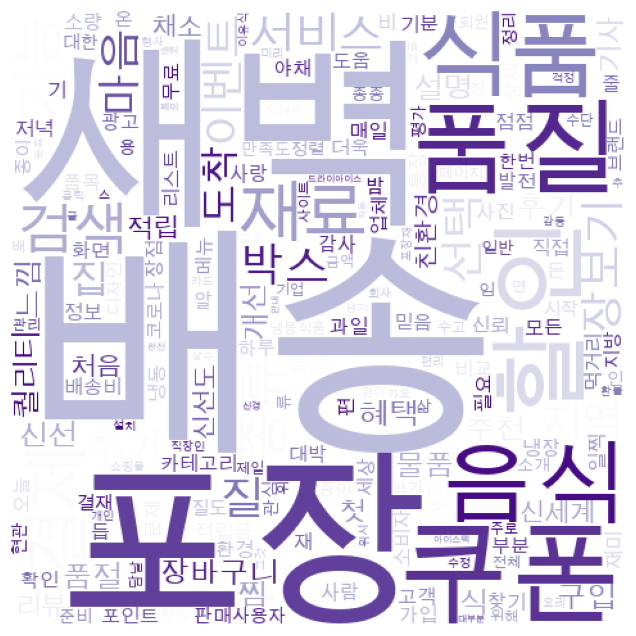

In [201]:
#wordcloud
data = token_review1.vocab().most_common(200)





#relative_scaling:글씨간격
#generate_from_frequencies:빈도수
wordcloud = WordCloud(
    font_path = '/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,
    background_color = 'white',
    width=480, height=480,
    colormap='Purples'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

---

#### wordcloud_0

In [106]:
df_wordcloud_0 = df_wordcloud[df_wordcloud['pred'] == 0.0]
df_wordcloud_0

,review,label,pred,TF
7159,업데이트 앱 실행,0.0,0.0,True
1223,장바구니 오류 회사 모바일 개발자,0.0,0.0,True
7191,갑자기 로그인 아이디 비번 고객 센터 번호 이용 실망 곳,0.0,0.0,True
7079,첫 결제 카드 잘못 골 취소 신규 회원 혜택 별,0.0,0.0,True
4606,곳 처음 곳 건물 입구 착각 못 런가 그게 점점 일부러 생각 비밀번호 오류 하니 요...,0.0,0.0,True
...,...,...,...,...
1403,일시 오류 계속,0.0,0.0,True
5764,상품 고객 가격 건 건가,0.0,0.0,True
1035,자꾸 적립금 문자 볼 랬더 주소 등록 답답,0.0,0.0,True
2947,가입,1.0,0.0,False


In [111]:
text_review0 = '. '.join(df_wordcloud_0['review'])
text_review0

'업데이트 앱 실행. 장바구니 오류 회사 모바일 개발자. 갑자기 로그인 아이디 비번 고객 센터 번호 이용 실망 곳. 첫 결제 카드 잘못 골 취소 신규 회원 혜택 별. 곳 처음 곳 건물 입구 착각 못 런가 그게 점점 일부러 생각 비밀번호 오류 하니 요청 사항 현관 공동 현관 비밀번호 뭐 하제 다행 공동 현관 앞 앱 배송 완료 집 문 앞 진짜 마지막 가관 신뢰 택배 진짜 못. 뭡 광고 상품 장난. 주문 중간 페이지 자꾸 종료 다시 물건 계속 반복 상품 구매 앱 정해. 최악. 신규 가입 첫 주문 쿠폰 주문 소리 소문 클레 임해 복구 척 다시 이후 전화 문의 해도 반응 서비스 처음 보기 전 정 고객 응대 엉망. 네이버 페이 무한 로그인. 업체 생각 오류 못 곳 처음 정말 답 물건 장바구니 도대체 해결 쿠폰 뭐 진짜 리뷰 쓰레기 소리 절로. 가입 자꾸 아이디 확인 하라 빈칸 아이디 제대로 기입 자꾸 짜증. 배송지 등록 등록 아예 아예 주문 쇼핑 앱 업데이트. 캐시 가입 캐시 탈퇴 함. 공동 현관 비밀번호 그냥 덩 감 주문 예정. 앱 장바구니 렉. 업데이트 완전 망삘이 고객 센터 하라 데 해도 계속 오류 담당 부서 뭐. 회원 가입 먹통 부분 앱 테스트. 상품 택배 분리 배송 알림 운송 조회 운송 번호 상품 도착 문의 카톡 문 문의 체킹 무리 보지. 로그인 아이디 비밀번호 찾기 부분 글자 볼 방법. 아주 최악 주문 용량 확인 첫 거래 장난 질 상담 통화 연락 일주일 연락. 최악 가입 적도 웰컴 그냥 수고. 앱 설치 설치. 서버 관리 하라 제발. 담당 부서 개선 요청 말 제대로 운영. 상세 페이지 앱 일시 정지 화면 며칠 반복 쇼핑 뜻 앱 이유 글 고객 센터 연락 답변. 지금껏 업데이트 이후 난리 자꾸만 로그아웃 상품 후기 목록 장 이후 깡그리 적립금 간 거나. 결제 정보 카드 인지도 쿠팡 주문 취소 결제 확인 과거 주문 정보 찾기 상장 신경 기본. 뭔가 밤 결제 계속 딜 레이 상품 선택 쿠폰 사용 결제 이용 사람 홈페이지 자체 사이트 문제. 첫 주문 냉동식품 환불 진짜 짜

In [56]:
# #txt 파일 열기
# wordcloud0 = open('wordcloud0.txt', 'w')
# wordcloud0.write(text_review0)
# wordcloud0.close()

In [112]:
#Okt로 명사단위 토큰화
okt = Okt()

tokenized_review0 = okt.nouns(text_review0)
tokenized_review0

['업데이트',
 '앱',
 '실행',
 '장바구니',
 '오류',
 '회사',
 '모바일',
 '개발자',
 '갑자기',
 '로그인',
 '아이디',
 '비번',
 '고객',
 '센터',
 '번호',
 '이용',
 '실망',
 '곳',
 '첫',
 '결제',
 '카드',
 '잘못',
 '골',
 '취소',
 '신규',
 '회원',
 '혜택',
 '별',
 '곳',
 '처음',
 '곳',
 '건물',
 '입구',
 '착각',
 '못',
 '런가',
 '그게',
 '점점',
 '일부러',
 '생각',
 '비밀번호',
 '오류',
 '하니',
 '요청',
 '사항',
 '현관',
 '공동',
 '현관',
 '비밀번호',
 '뭐',
 '하제',
 '다행',
 '공동',
 '현관',
 '앞',
 '앱',
 '배송',
 '완료',
 '집',
 '문',
 '앞',
 '진짜',
 '마지막',
 '가관',
 '신뢰',
 '택배',
 '진짜',
 '못',
 '뭡',
 '광고',
 '상품',
 '장난',
 '주문',
 '중간',
 '페이지',
 '자꾸',
 '종료',
 '다시',
 '물건',
 '계속',
 '반복',
 '상품',
 '구매',
 '앱',
 '정해',
 '최악',
 '신규',
 '가입',
 '첫',
 '주문',
 '쿠폰',
 '주문',
 '소리',
 '소문',
 '클레',
 '임해',
 '복구',
 '척',
 '다시',
 '이후',
 '전화',
 '문의',
 '해도',
 '반응',
 '서비스',
 '처음',
 '보기',
 '전',
 '정',
 '고객',
 '응대',
 '엉망',
 '네이버',
 '페이',
 '무한',
 '로그인',
 '업체',
 '생각',
 '오류',
 '못',
 '곳',
 '처음',
 '정말',
 '답',
 '물건',
 '장바구니',
 '도대체',
 '해결',
 '쿠폰',
 '뭐',
 '진짜',
 '리뷰',
 '쓰레기',
 '소리',
 '절로',
 '가입',
 '자꾸',
 '아이디',
 '확인',
 '하라',
 '빈칸',
 '아이디',
 '제대로'

In [113]:
#nltk_Text
token_review0 = nltk.Text(tokenized_review0, name='predicted_neg_review')
token_review0

<Text: predicted_neg_review>

In [114]:
#단어 빈도수
token_review0.vocab().most_common(150) 

[('앱', 168),
 ('주문', 167),
 ('장바구니', 157),
 ('배송', 145),
 ('업데이트', 122),
 ('상품', 105),
 ('가입', 101),
 ('계속', 81),
 ('컬리', 81),
 ('결제', 75),
 ('오류', 71),
 ('다시', 69),
 ('회원', 55),
 ('물건', 51),
 ('설치', 49),
 ('구매', 48),
 ('고객', 47),
 ('광고', 47),
 ('마켓', 47),
 ('문의', 46),
 ('전', 41),
 ('리뷰', 40),
 ('입력', 39),
 ('품절', 38),
 ('게', 38),
 ('로그인', 37),
 ('확인', 37),
 ('못', 36),
 ('삭제', 36),
 ('이용', 33),
 ('자꾸', 33),
 ('제품', 33),
 ('취소', 30),
 ('그냥', 30),
 ('쿠폰', 29),
 ('일시', 29),
 ('사용', 29),
 ('센터', 28),
 ('건', 28),
 ('지역', 28),
 ('이후', 27),
 ('수가', 27),
 ('재', 27),
 ('오늘', 26),
 ('배송지', 25),
 ('문제', 25),
 ('환불', 25),
 ('새벽', 25),
 ('진짜', 24),
 ('짜증', 24),
 ('사람', 24),
 ('주소', 24),
 ('아이디', 23),
 ('뭐', 23),
 ('처음', 22),
 ('최악', 22),
 ('말', 22),
 ('화면', 22),
 ('장애', 22),
 ('검색', 22),
 ('함', 21),
 ('연락', 21),
 ('시', 21),
 ('번호', 20),
 ('페이지', 20),
 ('답변', 20),
 ('보고', 20),
 ('접속', 20),
 ('생각', 19),
 ('개선', 19),
 ('불가', 19),
 ('택배', 18),
 ('등록', 18),
 ('아예', 18),
 ('상담', 18),
 ('후기', 18),
 ('더', 

In [125]:
#stop_words 제거
stop_words = ['다시', '더', '건', '게', '아예', '오늘', 
              '말', '문제', '건가', '첫', '짜증', '하니', 
              '이후', '완료', '보고', '보기', '주문', '마켓', '컬리', '뭐', '생각', '사용', '계속']

token_review0 = [word for word in token_review0 if word not in stop_words]
token_review0 = nltk.Text(token_review0, name='predicted_pos_review')

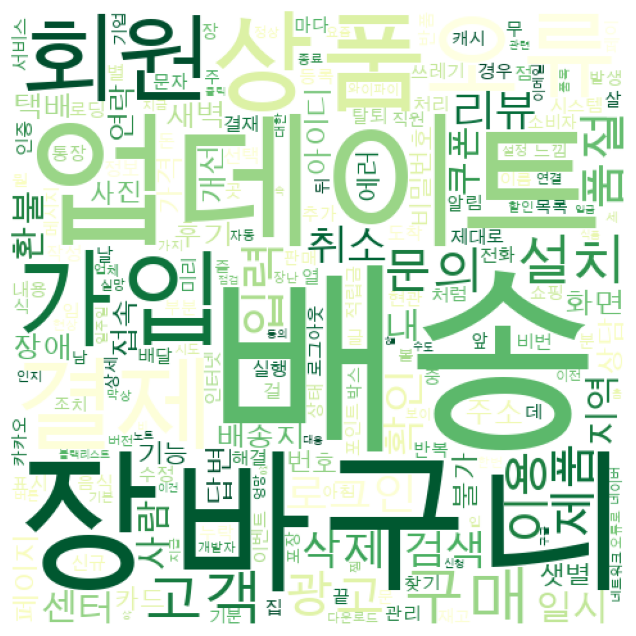

In [207]:
#wordcloud
data = token_review0.vocab().most_common(200)

#relative_scaling:글씨간격
#generate_from_frequencies:빈도수
wordcloud = WordCloud(
    font_path = '/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,
    background_color = 'white',
    width=480, height=480,
    colormap='YlGn'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

---

In [128]:
#vectorize reviews
contents_for_vectorize_noun = df_review['reviews_for_vectorize']

#TfidfVectorizer
vectorizer_tfidf_noun = TfidfVectorizer(min_df=10, decode_error='ignore')

vectorizer_tfidf_noun.fit_transform(contents_for_vectorize_noun)

#말뭉치
corpus_noun = []

for word in vectorizer_tfidf_noun.get_feature_names_out():
    corpus_noun.append(word)

In [129]:
#logistic regression

#feature, label 분리
X_noun = vectorizer_tfidf_noun.fit_transform(contents_for_vectorize_noun)
y_noun = df_review['label']

#train, test data 분리
X_noun_train, X_noun_test, y_noun_train, y_noun_test = train_test_split(X_noun, 
                                                                        y_noun, 
                                                                        test_size=0.3, 
                                                                        random_state=13, 
                                                                        stratify=y_noun)

#kfold(StratifiedKFold가 좋을까?)
skfold = StratifiedKFold(n_splits=5)


#평가지표
accuracy = []
f1 = []
auc = []


#test_data 평가지표
accuracy_test = []
f1_test = []
auc_test = []


logistic_reg_noun = LogisticRegression(solver = 'sag', max_iter = 1000, penalty='l2', C=3)
    
for train_idx, validation_idx in skfold.split(X_noun_train, y=y_noun_train):
        
    X_train = X_noun_train[train_idx]
    X_validation = X_noun_train[validation_idx]
        
    y_train = y_noun_train.iloc[train_idx]
    y_validation = y_noun_train.iloc[validation_idx]
        
    #fit_predict
    logistic_reg_noun.fit(X_train, y_train)
    pred_validation = logistic_reg_noun.predict(X_validation)
        
        
    #accuracy, f1, auc
    accuracy.append(accuracy_score(pred_validation, y_validation))
    f1.append(f1_score(pred_validation, y_validation))
    auc.append(roc_auc_score(pred_validation, y_validation))
    
pred_test = logistic_reg_noun.predict(X_noun_test) 
        
#test_data accuracy, f1, auc
accuracy_test.append(accuracy_score(pred_test, y_noun_test))
f1_test.append(f1_score(pred_test, y_noun_test))
auc_test.append(roc_auc_score(pred_test, y_noun_test))
    
#평가지표

print('accuracy of sag : {}'.format(sum(accuracy) / len(accuracy)))
print('-'*100)
print('f1 of sag : {}'.format(sum(f1) / len(f1)))
print('-'*100)
print('auc of sag : {}'.format(sum(auc) / len(auc)))

print('='*100)


print('accuracy_test of sag : {}'.format(accuracy_test))
print('-'*100)
print('f1_test of sag : {}'.format(f1_test))
print('-'*100)
print('auc_test of sag : {}'.format(auc_test))

accuracy of sag : 0.9148854961832061
----------------------------------------------------------------------------------------------------
f1 of sag : 0.9483381647980587
----------------------------------------------------------------------------------------------------
auc of sag : 0.892072097571698
accuracy_test of sag : [0.9204511724547343]
----------------------------------------------------------------------------------------------------
f1_test of sag : [0.9516245487364621]
----------------------------------------------------------------------------------------------------
auc_test of sag : [0.899646482301031]


----

#### 전처리

In [130]:
pred_test

array([0., 1., 1., ..., 1., 0., 1.])

In [131]:
y_noun_test

7159    0.0
3181    1.0
5345    1.0
7995    1.0
4931    1.0
       ... 
8530    1.0
9709    1.0
6855    1.0
1103    0.0
2477    1.0
Name: label, Length: 3369, dtype: float64

In [132]:
#y_noun_test label과 예측 결과를 dataframe으로 변환
df_wordcloud = y_noun_test.to_frame()
df_wordcloud['pred'] = pred_test
df_wordcloud['TF'] = df_wordcloud['label'] == df_wordcloud['pred']
df_wordcloud

,label,pred,TF
7159,0.0,0.0,True
3181,1.0,1.0,True
5345,1.0,1.0,True
7995,1.0,1.0,True
4931,1.0,1.0,True
...,...,...,...
8530,1.0,1.0,True
9709,1.0,1.0,True
6855,1.0,1.0,True
1103,0.0,0.0,True


In [133]:
#y_noun_test로 분류된 '리뷰', 'label', 'pred_test(test_data예측결과)'를 dataframe으로 만든다.
review = []

for i in y_noun_test.index:
    review.append(df_review['reviews_for_vectorize'][i].strip())
    
df_wordcloud['review'] = review
df_wordcloud = df_wordcloud[['review', 'label', 'pred', 'TF']]
df_wordcloud

,review,label,pred,TF
7159,업데이트 앱 실행 안됩니다,0.0,0.0,True
3181,배송 빠르고 품질,1.0,1.0,True
5345,물건 다양했으면 좋겠어요,1.0,1.0,True
7995,자주 이용 할인 쿠폰 많이 주고 적립 잘 되고 물건 신선해요,1.0,1.0,True
4931,친구 추천 마켓 컬리 이용 하게 됐는데 포장 이며 배송 이며 상품 완전히 만족해요 ...,1.0,1.0,True
...,...,...,...,...
8530,가끔 렉 걸리는 빼고 좋음 연관 선택 카테고리 생기 면 좋겠다 선택 상품 구매 산 ...,1.0,1.0,True
9709,서비스 배송,1.0,1.0,True
6855,쪼아,1.0,1.0,True
1103,업데이트 장바구니 물건 담겨요 실패하고 마음 평화 깨져서 그냥 데 서 구매 하러 갑니다,0.0,0.0,True


---

#### morph

#### wordcloud_1

In [134]:
df_wordcloud_1 = df_wordcloud[df_wordcloud['pred'] == 1.0]
df_wordcloud_1

,review,label,pred,TF
3181,배송 빠르고 품질,1.0,1.0,True
5345,물건 다양했으면 좋겠어요,1.0,1.0,True
7995,자주 이용 할인 쿠폰 많이 주고 적립 잘 되고 물건 신선해요,1.0,1.0,True
4931,친구 추천 마켓 컬리 이용 하게 됐는데 포장 이며 배송 이며 상품 완전히 만족해요 ...,1.0,1.0,True
9498,잘 이용 있습니다,1.0,1.0,True
...,...,...,...,...
8998,자주 애용 하는데 정말 만족합니다,1.0,1.0,True
8530,가끔 렉 걸리는 빼고 좋음 연관 선택 카테고리 생기 면 좋겠다 선택 상품 구매 산 ...,1.0,1.0,True
9709,서비스 배송,1.0,1.0,True
6855,쪼아,1.0,1.0,True


In [135]:
text_review1 = '. '.join(df_wordcloud_1['review'])
text_review1

'배송 빠르고 품질. 물건 다양했으면 좋겠어요. 자주 이용 할인 쿠폰 많이 주고 적립 잘 되고 물건 신선해요. 친구 추천 마켓 컬리 이용 하게 됐는데 포장 이며 배송 이며 상품 완전히 만족해요 쿠팡 우회 원 쿠팡 충성 고객 였는데 요즘 마켓 컬리 이용 답니. 잘 이용 있습니다. 빠른 배송 놀랍습니다. 가격 비싸긴 빠른 배송 좋아서 4 개입 니 할인 쿠폰 금액 커서. 특별한 서비스 신선한 제품 원하는 상품 편하게 받고 있습니다. 간편하게 주문 빠르게 배송 받았습니다. 편하고 깔끔하고 적립금 잘 들어오고. 빠르고 신선한 식품 주문 마다 성공 이라 젠 그냥 믿고 주문 합니다 신선 식품 주문 컬리 최고. 마트 멀고 바빠서 사용. 너무 편해요 서비스 최상 이에요. 마켓 컬리. 새벽 배송. 사용 간편하고 물건 다양해서. 장 보는 즐거움 알려주는 마켓. 직관 이고. 빠르고 합리 인 가격 너무. 배송 빠르고 제품 만족해요. 주문 물품 추가 기능 넣어주시면 될까 가끔 빼먹고 주문 하는 경우 있어서 주문 추가 기능 있었으면 좋겠어요. 신선하고 배송 빨라요. 밤늦게 주문 해도 날 배송 너무 편리해요. 드디어 찜 기능 생겼군요 만족합니다. 쿠폰 자주 주고 좋은 상품 좋은 가격 구매 있어서 만족합니다. 이벤트 자주 있었으면 좋겠습니다. 주로 대형 마트 구매 했는데요 생각 보다 상품 신선해 너무. 신선한 식 자재 살 있어 사이트 비해 가격 더 비싼데 신선하고 맛있어서 만족해요. 배송 하시 기는 힘들겠지만 배송 빨 라서 좋고 신선한 제품 받을 있어서 최고. 아주 유용합니다. 첫 주문 쿠폰 적립 씩 7000원 쿠폰 쏴주고 좋습니다 담날 새벽 품질 좋은 상품 배달 받을 있고요 40000원 구매 해야 배송비 무료 라는 단점 있긴 충분히 재구매 의사 있습니다. 쿠폰 적용 잘 되고 상품 다양해서. 다양한 물건 많아서. 타 사이트 보다 메뉴 별 항목 잘 정돈 되어서 보기 편해요 화면 볼 있는 내 역도 많아서 더 정리 된 느낌 검색어 입력 관련 항목 나열 되면 찾고자 하는 게 품절 시 맨 마지막 정

In [55]:
# #txt 파일 열기
# wordcloud1 = open('wordcloud1.txt', 'w')
# wordcloud1.write(text_review1)
# wordcloud1.close()

In [136]:
#Okt로 명사단위 토큰화
okt = Okt()

token_review1 = okt.nouns(text_review1)
token_review1

['배송',
 '품질',
 '물건',
 '자주',
 '이용',
 '할인',
 '쿠폰',
 '적립',
 '물건',
 '친구',
 '추천',
 '마켓',
 '컬리',
 '이용',
 '포장',
 '배송',
 '상품',
 '쿠팡',
 '우회',
 '원',
 '쿠팡',
 '충성',
 '고객',
 '요즘',
 '마켓',
 '컬리',
 '이용',
 '답',
 '이용',
 '배송',
 '가격',
 '배송',
 '개입',
 '니',
 '할인',
 '쿠폰',
 '금액',
 '커서',
 '서비스',
 '제품',
 '상품',
 '주문',
 '배송',
 '적립금',
 '식품',
 '주문',
 '마다',
 '성공',
 '젠',
 '그냥',
 '주문',
 '신선',
 '식품',
 '주문',
 '컬리',
 '최고',
 '마트',
 '사용',
 '서비스',
 '최상',
 '마켓',
 '컬리',
 '새벽',
 '배송',
 '사용',
 '물건',
 '장',
 '즐거움',
 '마켓',
 '직관',
 '합리',
 '인',
 '가격',
 '배송',
 '제품',
 '주문',
 '물품',
 '추가',
 '기능',
 '가끔',
 '주문',
 '경우',
 '주문',
 '추가',
 '기능',
 '배송',
 '주문',
 '해도',
 '날',
 '배송',
 '찜',
 '기능',
 '쿠폰',
 '자주',
 '상품',
 '가격',
 '구매',
 '이벤트',
 '자주',
 '주로',
 '대형',
 '마트',
 '구매',
 '생각',
 '상품',
 '식',
 '자재',
 '살',
 '사이트',
 '가격',
 '더',
 '배송',
 '배송',
 '빨',
 '라서',
 '제품',
 '최고',
 '아주',
 '첫',
 '주문',
 '쿠폰',
 '적립',
 '쿠폰',
 '담날',
 '새벽',
 '품질',
 '상품',
 '배달',
 '구매',
 '배송비',
 '무료',
 '단점',
 '의사',
 '쿠폰',
 '적용',
 '상품',
 '물건',
 '타',
 '사이트',
 '메뉴',
 '별',
 '항목',
 '정돈',
 '보기',

In [137]:
#nltk_Text
token_review1 = nltk.Text(tknized_review1, name='predicted_pos_review')
token_review1

<Text: predicted_pos_review>

In [138]:
for i in token_review1:
    print(i)

배송
품질
물건
자주
이용
할인
쿠폰
적립
물건
친구
추천
마켓
컬리
이용
포장
배송
상품
쿠팡
우회
쿠팡
충성
고객
요즘
마켓
컬리
이용
답
이용
배송
가격
배송
개입
니
할인
쿠폰
금액
커서
서비스
제품
상품
주문
배송
적립금
식품
주문
성공
젠
그냥
주문
신선
식품
주문
컬리
최고
마트
사용
서비스
최상
마켓
컬리
새벽
배송
사용
물건
장
즐거움
마켓
직관
합리
가격
배송
제품
후기
란
개선
매우
후기
보라
그냥
포인트
보기
쓰기
불편
수정
후기
내용
목록
몀
스
크롤
맨
위로
후기
내용
미리
보기
후기
정렬
카테고리
주문
물품
추가
기능
가끔
주문
경우
주문
추가
기능
배송
주문
날
배송
찜
기능
쿠폰
자주
상품
가격
구매
이벤트
자주
주로
대형
마트
구매
생각
상품
식
자재
살
사이트
가격
더
배송
배송
빨
제품
최고
아주
첫
주문
쿠폰
적립
쿠폰
담날
새벽
품질
상품
배달
구매
배송비
무료
단점
의사
쿠폰
적용
상품
물건
타
사이트
메뉴
별
항목
정돈
보기
화면
볼
역도
더
정리
느낌
검색어
입력
관련
항목
나열
게
품절
시
맨
마지막
정리
한참
게
더
제품
적립
검색
리뷰
주로
선택
데
리뷰
신뢰
주소
잘못
물품
못
수거
직접
해주시
지난
음식
직접
처리
해주시
학도
진행
과정
처리
과정
설명
아주
상담
앱
사용
엄마
최고
물품
제공
직관
다시
앱
선녀
신형
앱
뭐
못
배송
품질
최고
이용
가격
새벽
문
앞
배달
실제
사용
애
엄마
장
게
제일
안심
정말
마콜
최고
배송
닭
가슴
살
주문
가능
아주
내
스타일
이군
집
그냥
땐
새벽
배송
출근
냉동
제품
냉장
제품
선택
충청
지역
새벽
배송
니요
새벽
출근
배송
완료
컬리
앱
혁명
핸드폰
하나로
마트
턺
채소
아주
만족
여자친구
소개
알
바
그냥
지속
발전
게
소비자
입장
보임
단연
최고
말
할인
혜택
쿠폰
물건
질
샛별
배송
모든
게
앱
후기
앱
설문조사
그냥
마켓
컬리
추천
할인
쿠폰
식품
신선
배송
컬리
앱
설정
설정
음식
배달
문
앞
배송
최고
가성
비
고추장
불고기
최애
대박
나시
품절
직

In [139]:
#단어 빈도수
token_review1.vocab().most_common(150) 

[('배송', 844),
 ('상품', 361),
 ('사용', 323),
 ('컬리', 311),
 ('제품', 284),
 ('앱', 241),
 ('주문', 239),
 ('마켓', 216),
 ('이용', 199),
 ('새벽', 179),
 ('포장', 173),
 ('쿠폰', 171),
 ('구매', 155),
 ('더', 144),
 ('정말', 144),
 ('자주', 133),
 ('최고', 125),
 ('물건', 117),
 ('가격', 117),
 ('게', 104),
 ('아주', 100),
 ('품질', 95),
 ('할인', 86),
 ('샛별', 82),
 ('장', 76),
 ('식품', 75),
 ('보기', 75),
 ('아침', 75),
 ('배달', 70),
 ('앞', 67),
 ('음식', 66),
 ('재료', 66),
 ('결제', 66),
 ('쇼핑', 64),
 ('검색', 61),
 ('볼', 60),
 ('만족', 60),
 ('항상', 58),
 ('애용', 55),
 ('기능', 53),
 ('매우', 51),
 ('종류', 50),
 ('날', 49),
 ('맛', 46),
 ('마트', 45),
 ('생각', 45),
 ('진짜', 45),
 ('택배', 43),
 ('중', 43),
 ('서비스', 42),
 ('빨', 42),
 ('듯', 42),
 ('요즘', 41),
 ('장보기', 41),
 ('이벤트', 40),
 ('박스', 40),
 ('살', 39),
 ('선택', 39),
 ('맘', 39),
 ('질', 38),
 ('마음', 38),
 ('지역', 37),
 ('건', 37),
 ('전', 37),
 ('추가', 36),
 ('집', 36),
 ('늘', 36),
 ('계속', 35),
 ('도착', 35),
 ('장바구니', 35),
 ('품절', 34),
 ('신선', 33),
 ('후기', 33),
 ('식', 33),
 ('혜택', 33),
 ('곳', 33),
 ('찜',

In [177]:
#stop_words 제거
stop_words = ['사용', '상품', '제품', '앱', '주문', '이용', '더', 
              '정말', '자주', '게', '아주', '장', '보기', '앞', 
              '볼', '항상', '매우', '날', '맛', '애용', '매우', 
              '생각', '진짜', '중', '빨', '듯', '요즘', '살', 
              '맘', '건', '전', '늘', '계속', '곳', '못', '점', 
              '가지', '다시', '보고', '별', '걸', '짱', '그냥', 
              '함', '시', '뭐', '문', '내', '말', '무', '데', 
              '이제', '처리', '가성', '원', '덕분', '가끔', '경우', 
              '경험', '상태', '쿠팡', '지금', '최고', '구성', '별로', 
              '꼭', '오류', '방법', '번창', '가장', '정도', '시스템', 
              '구매', '물건', '들', '마켓', '컬리', '가격', '샛별', '배달', '아침', '마트', '쇼핑', '때문', '주시', '수가', '만족', '택배']

token_review1 = [word for word in token_review1 if word not in stop_words]
token_review1 = nltk.Text(token_review1, name='predicted_pos_review')

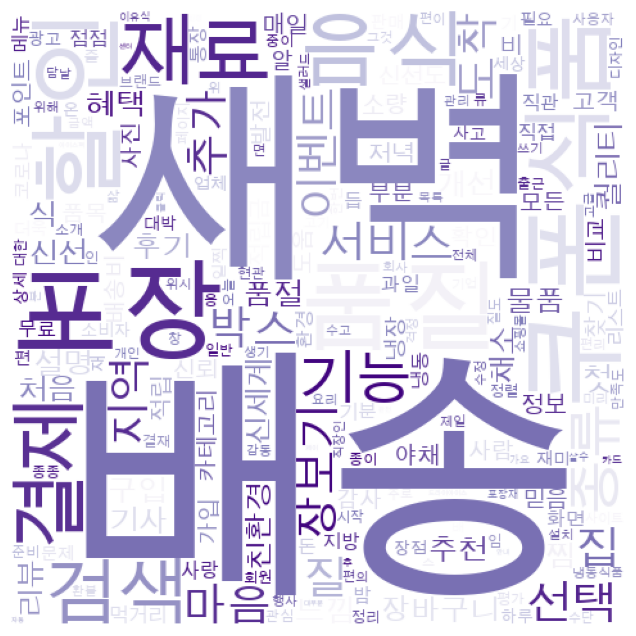

In [194]:
#wordcloud
data = token_review1.vocab().most_common(200)



#relative_scaling:글씨간격
#generate_from_frequencies:빈도수
wordcloud = WordCloud(
    font_path = '/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,
    background_color = 'white',
    width=480, height=480,
    colormap='Purples'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

---

#### wordcloud_0

In [144]:
df_wordcloud_0 = df_wordcloud[df_wordcloud['pred'] == 0.0]
df_wordcloud_0

,review,label,pred,TF
7159,업데이트 앱 실행 안됩니다,0.0,0.0,True
1223,장바구니 오류 고쳐져요 회사 모바일 개발자 없나요,0.0,0.0,True
7191,갑자기 로그인 되고 아이디 비번 맞지 않는다고 떠요 고객 센터 번호 없고 영원히 이...,0.0,0.0,True
7079,첫 결제 카드 잘못 골 라서 취소 했는데 신규 회원 혜택 없애 버리네요 별 1 먹고...,0.0,0.0,True
4606,5 그랬는데 4 잘 못 된 곳 두는 였어요 처음 엔 사는 곳 건물 입구 착각 못 찾...,0.0,0.0,True
...,...,...,...,...
1403,일시 인 오류 계속 떠요,0.0,0.0,True
5764,같은 상품 고객 마다 가격 건 된 건가,0.0,0.0,True
1035,자꾸 적립금 문자 오길래 써 볼 랬더 니 주소 등록 안되고 답답,0.0,0.0,True
266,최근 품절 이라고 떠있어서 장바구니 넣었는데 품절 이라 뜨는 경우 굉장히 많아짐 방...,0.0,0.0,True


In [145]:
text_review0 = '. '.join(df_wordcloud_0['review'])
text_review0

'업데이트 앱 실행 안됩니다. 장바구니 오류 고쳐져요 회사 모바일 개발자 없나요. 갑자기 로그인 되고 아이디 비번 맞지 않는다고 떠요 고객 센터 번호 없고 영원히 이용 할래요 대 실망 이에요 속이 터져서 곳 갈아탑니다. 첫 결제 카드 잘못 골 라서 취소 했는데 신규 회원 혜택 없애 버리네요 별 1 먹고 꺼지세요. 5 그랬는데 4 잘 못 된 곳 두는 였어요 처음 엔 사는 곳 건물 입구 착각 못 찾아서 런가 보다 했습니다 그게 2 되고 3 되니 점점 일부러 인가 생각 들며 비밀번호 오류 하니 요청 사항 확실하게 공 동 현관 이며 공동 현관 비밀번호 뭐 적었더니 하제 깨어있어서 다행 이었지 공동 현관 앞 놓고 앱 에선 배송 완료 집 문 앞 뒀다 치니 없어서 진짜 마지막 가관 이라 신뢰 없어지고 택배 없어질까 무서워서 진짜 필요하지 않으면 서 못 시키겠어요. 뭡 니까 광고 뜨길래 찍으면 상품 보이질 않아요 장난 인 거야. 후기 란 개선 매우 필요함 후기 보라 고 있는 건지 그냥 포인트 있는 건지 보기 쓰기 불편 수정 불가한 후기 내용 읽고 목록 돌아오 몀 스 크롤 맨 위로 돌아가는 후기 내용 미리 보기 없는 후기 정렬 카테고리 고쳐 줬으면 좋겠다. 최악. 신규 가입 첫 주문 쿠폰 주문 했는데 소리 소문 없이 없애네요 클레 임해 1 복구 시켜주는 척 하다가 다시 지워 버리고 이후 에는 전화 문의 해도 반응 없습니다 서비스 처음 써 보기 전 정 떨어져서 지우게 되네요 고객 응대 엉망. 네이버 페이 되나요 무한 로그인 너무 불편합니다. 큰 업체 라고 생각 했는데 이렇게 오류 오래 못 잡아내는 곳 처음 봤어요 정말 답 없네요 7월 29일 물건 사러 들어갔더니 안되던데 아직 라니 장바구니 비어있는 저만 그런 같지 않은데 도대체 아직도 해결 못 하는 죠 쿠폰 뭐 하러 줘요 쓰지도 못 하게 해놓고 진짜 하면 리뷰 쓰는데 쓰레기 같단 소리 절로 나와요. 가입 하려는데 자꾸 아이디 확인 하라 뜨는데 이래요 빈칸 없이 아이디 제대로 기입 했는데 자꾸 뜨니 짜증 나네요 예요. 주문 하려

In [56]:
# #txt 파일 열기
# wordcloud0 = open('wordcloud0.txt', 'w')
# wordcloud0.write(text_review0)
# wordcloud0.close()

In [146]:
#Okt로 명사단위 토큰화
okt = Okt()

tokenized_review0 = okt.nouns(text_review0)
tokenized_review0

['업데이트',
 '앱',
 '실행',
 '장바구니',
 '오류',
 '회사',
 '모바일',
 '개발자',
 '갑자기',
 '로그인',
 '아이디',
 '비번',
 '고객',
 '센터',
 '번호',
 '이용',
 '실망',
 '곳',
 '첫',
 '결제',
 '카드',
 '잘못',
 '골',
 '라서',
 '취소',
 '신규',
 '회원',
 '혜택',
 '별',
 '못',
 '곳',
 '처음',
 '곳',
 '건물',
 '입구',
 '착각',
 '못',
 '런가',
 '그게',
 '점점',
 '일부러',
 '생각',
 '비밀번호',
 '오류',
 '하니',
 '요청',
 '사항',
 '공',
 '현관',
 '공동',
 '현관',
 '비밀번호',
 '뭐',
 '하제',
 '다행',
 '공동',
 '현관',
 '앞',
 '앱',
 '배송',
 '완료',
 '집',
 '문',
 '앞',
 '진짜',
 '마지막',
 '가관',
 '신뢰',
 '택배',
 '진짜',
 '못',
 '뭡',
 '광고',
 '상품',
 '장난',
 '인',
 '후기',
 '란',
 '개선',
 '매우',
 '후기',
 '보라',
 '고',
 '그냥',
 '포인트',
 '보기',
 '쓰기',
 '불편',
 '수정',
 '후기',
 '내용',
 '목록',
 '몀',
 '스',
 '크롤',
 '맨',
 '위로',
 '후기',
 '내용',
 '미리',
 '보기',
 '후기',
 '정렬',
 '카테고리',
 '최악',
 '신규',
 '가입',
 '첫',
 '주문',
 '쿠폰',
 '주문',
 '소리',
 '소문',
 '클레',
 '임해',
 '복구',
 '척',
 '다시',
 '이후',
 '전화',
 '문의',
 '해도',
 '반응',
 '서비스',
 '처음',
 '보기',
 '전',
 '정',
 '고객',
 '응대',
 '엉망',
 '네이버',
 '페이',
 '무한',
 '로그인',
 '업체',
 '생각',
 '오류',
 '못',
 '곳',
 '처음',
 '정말',
 '답',
 '물건',
 '

In [147]:
#nltk_Text
token_review0 = nltk.Text(tokenized_review0, name='predicted_neg_review')
token_review0

<Text: predicted_neg_review>

In [148]:
#단어 빈도수
token_review0.vocab().most_common(150) 

[('주문', 177),
 ('앱', 168),
 ('배송', 160),
 ('장바구니', 150),
 ('업데이트', 113),
 ('상품', 108),
 ('가입', 98),
 ('컬리', 81),
 ('결제', 80),
 ('못', 78),
 ('계속', 77),
 ('다시', 72),
 ('오류', 68),
 ('회원', 57),
 ('물건', 53),
 ('구매', 51),
 ('고객', 49),
 ('게', 49),
 ('설치', 47),
 ('광고', 46),
 ('마켓', 44),
 ('문의', 43),
 ('품절', 41),
 ('인', 40),
 ('고', 39),
 ('전', 39),
 ('이용', 38),
 ('입력', 38),
 ('제품', 38),
 ('로그인', 37),
 ('해도', 37),
 ('리뷰', 37),
 ('확인', 37),
 ('삭제', 36),
 ('그냥', 35),
 ('면', 34),
 ('취소', 33),
 ('자꾸', 33),
 ('검색', 31),
 ('센터', 30),
 ('하니', 29),
 ('일시', 29),
 ('사용', 29),
 ('건', 28),
 ('지역', 28),
 ('원', 27),
 ('환불', 27),
 ('쿠폰', 26),
 ('이후', 26),
 ('짜증', 26),
 ('함', 26),
 ('말', 26),
 ('사람', 26),
 ('문제', 26),
 ('내', 26),
 ('재', 26),
 ('수가', 25),
 ('진짜', 24),
 ('배송지', 24),
 ('주소', 24),
 ('오늘', 24),
 ('뭐', 23),
 ('택배', 23),
 ('최악', 23),
 ('새벽', 23),
 ('아이디', 22),
 ('처음', 22),
 ('후기', 22),
 ('화면', 22),
 ('장애', 22),
 ('연락', 21),
 ('보고', 21),
 ('불가', 20),
 ('시', 20),
 ('첫', 19),
 ('완료', 19),
 ('개선', 19),
 (

In [172]:
#stop_words 제거
stop_words = ['다시', '더', '건', '게', '아예', '오늘', 
              '말', '문제', '건가', '첫', '짜증', '하니', 
              '이후', '완료', '보고', '보기', '주문', '마켓', 
              '컬리', '뭐', '생각', '사용', '계속', '앱', '못', 
              '하라', '해도', '이나', '원', '최악', '함', '면', 
              '그냥', '결', '아무', '인', '진짜', '자꾸', '듯', 
              '재', '자주', '정말', '별로', '정도', '창', '폰', 
              '두', '며칠', '자체', '때문', '고', '처음', '수가', '시', '쿠팡', '카톡', '물건', '전', '갑자기']

token_review0 = [word for word in token_review0 if word not in stop_words]
token_review0 = nltk.Text(token_review0, name='predicted_pos_review')

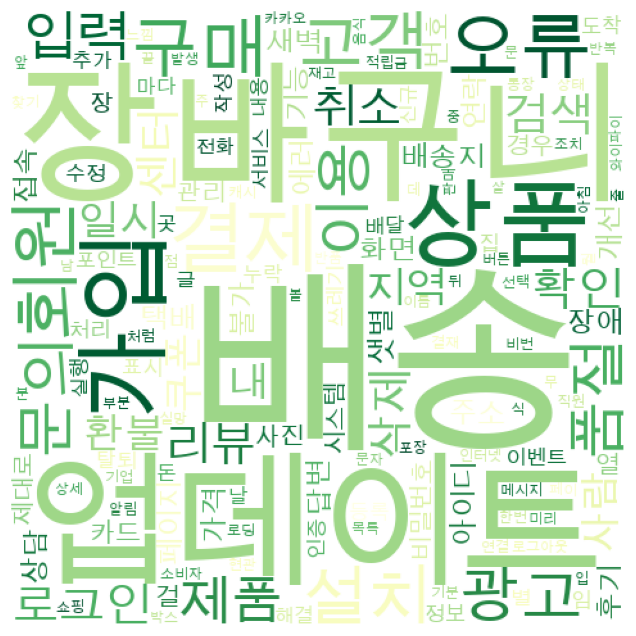

In [210]:
#wordcloud
data = token_review0.vocab().most_common(150)

#relative_scaling:글씨간격
#generate_from_frequencies:빈도수
wordcloud = WordCloud(
    font_path = '/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,
    background_color = 'white',
    width=480, height=480,
    colormap='YlGn'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()